# Exercise 1 : Tensors and layers 

## Build the model and using Keras backend

In [1]:
# Question 1
# import keras backend
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# load data
X_train=np.load('data/banknotes/X_train.npy')
y_train=np.load('data/banknotes/y_train.npy')
X_test=np.load('data/banknotes/X_test.npy')
y_test=np.load('data/banknotes/y_test.npy')

# build the model
model1=Sequential()
model1.add(Dense(2, input_shape=(4,), activation='relu', kernel_initializer='normal'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
initial_weights=model1.get_weights()

# Question 2
# get the input layer from the first layer of the model
inp=model1.layers[0].input
# get the output layer from the first layer of the model
out=model1.layers[0].output

# Question 3
# use K.function to map input and output layers
inp_to_out=K.function([inp],[out])

# Question 4
# print the results of passing X_test through the the first layer
print(inp_to_out([X_test]))

Using TensorFlow backend.
C:\Users\totot\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\totot\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\totot\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\totot\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

KeyboardInterrupt: 

## Neurons separation

In [ ]:
import matplotlib.pyplot as plt

# restore initial weights
model1.set_weights(initial_weights)

# define the number of epochs as a loop parameter
n_epochs=100
for i in range(1, n_epochs+1):  
    # train the model for only 1 epoch to observe the separation over epochs
    model1.fit(X_train, y_train, epochs=1, verbose=0)
    
    if i==1 or i%(n_epochs/5)==0:
        
        # Question 5  
        # get the output of the first layer using the validation data  
        layer_output=inp_to_out([X_test])
        # get the correct array format
        layer_output_np=layer_output[0]

        # Question 6        
        # evaluate the model accuracy for this epoch
        test_accuracy=model1.evaluate(X_test, y_test, verbose=0)[1] 

        # Question 7
        # plot the first neuron output vs the second neuron output
        plt.figure()
        plt.scatter(layer_output_np[:, 0], layer_output_np[:, 1], c=y_test)
        plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))
        plt.ylabel('Neuron 2')
        plt.xlabel('Neuron 1')        
        plt.show()

# Exercise 2 : Autoencoder

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import numpy as np

# Question 1
# load MNIST data
(X_train, y_train), (X_test, y_test)=mnist.load_data()
# normalize data
X_train=X_train/255.
X_test=X_test/255.
# reshape data : flatten 2D matrix to 1D vector
X_train=X_train.reshape(X_train.shape[0], -1)
X_test=X_test.reshape(X_test.shape[0], -1) 

# Question 2
# build the model
autoencoder=Sequential()
autoencoder.add(Dense(32, input_shape=(784, ), activation='relu'))

# Question 3
# add the output layer
autoencoder.add(Dense(784, activation='sigmoid'))

# Question 4
# compile the autoencoder
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

# Question 5
# train the autoencoder : features and labels are both X_train
autoencoder.fit(X_train, X_train, epochs=5)

# create a gaussian distribution with 0 mean and 0.5 standard deviation
noise=np.random.normal(loc=0, scale=0.5, size=X_test.shape)
# add noise to test images
X_test_noisy=X_test+noise
# predict the output of the noisy image using the autoencoder 
decoded_imgs=autoencoder.predict(X_test_noisy)

11493376/11490434 [==============================] - 19s 2us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.1363
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0969
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0950
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0944
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0942


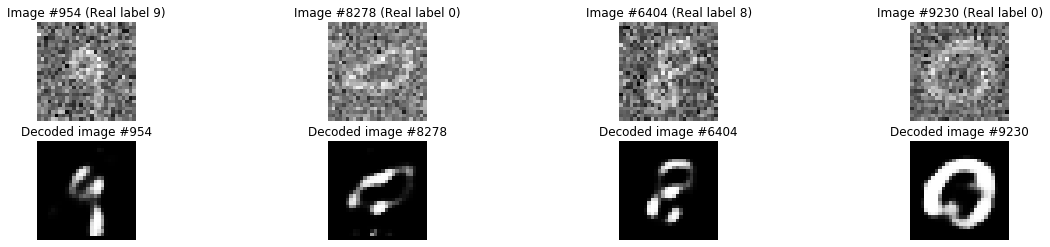

In [5]:
# Question 6
# display the noisy images vs the decoded images from the autoencoder

import matplotlib.pyplot as plt

# define a comparison plot function 
def compare_plot(X_test_noisy, decoded_imgs):
    # define the number of images to decode
    number_of_images=4
    fig=plt.figure(figsize=(20, 4))
    
    for i in range(number_of_images):
        # display the noisy image        
        # select a random image index from the test dataset
        random_test_image=np.random.randint(X_test.shape[0])
        fig=plt.subplot(2, number_of_images, i+1)
        fig.imshow(X_test_noisy[random_test_image].reshape(28, 28), cmap='gray')
        fig.axis('off')
        fig.set_title('Image #{} (Real label {})'.format(random_test_image, y_test[random_test_image]))

        # display the decoded image
        fig=plt.subplot(2, number_of_images, i+1+number_of_images)
        fig.imshow(decoded_imgs[random_test_image].reshape(28, 28), cmap='gray')
        fig.axis('off')
        fig.set_title('Decoded image #{}'.format(random_test_image))   

# plot noisy vs decoded images
compare_plot(X_test_noisy, decoded_imgs)

# Exercise 3 : Build a CNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

# Question 1
# import Conv2D and Flatten layers
from keras.layers import Conv2D, Flatten

# instantiate the model
cnn_model=Sequential()

# Question 2
# add a convolutional layer of 32 filters of size 3x3 with the appropriate input_shape
cnn_model.add(Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1),  activation='relu'))
  
# Question 3    
# add a convolutional layer of 16 filters of size 3x3 with relu activation
cnn_model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))

# Question 4
# flatten the previous layer output
cnn_model.add(Flatten())

# Question 5
# add the output layer with as many outputs as classes with a softmax activation
cnn_model.add(Dense(10, activation='softmax'))

# Question 6
# compile the model
cnn_model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# load MNIST train data
(X_train, y_train), (X_test, y_test)=mnist.load_data()
# normalize data
X_train=X_train/255.
# reshape data: transform the shape into a 4D tensor 
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
# encode labels into one hot representation
y_train=to_categorical(y_train)

# train the model
cnn_model.fit(X_train, y_train, epochs=2)

# Results from convolutions

In [ ]:
from keras.models import Model

# Question 7
# define the activation of the first convolutional layer
first_conv_activation=Model(inputs=cnn_model.input, outputs=cnn_model.layers[0].output)

# define the activation of the second convolutional layer
second_conv_activation=Model(inputs=cnn_model.input, outputs=cnn_model.layers[1].output)

# load MNIST test features
X_test=X_test/255.
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)

# Question 8
# predict X_test activations from the first and the second convolutional layers  
activation_conv1=first_conv_activation.predict(X_test)
activation_conv2=second_conv_activation.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

# define conv outputs plot function 
def plot_conv_output(index_test_img, i_filter_conv1, i_filter_conv2):
    number_of_filters=4       
    i_fig=1
    fig1=plt.figure(figsize=(10, 2))
    
    for i in range(number_of_filters):   
        fig1=plt.subplot(1, 4, i_fig)
        fig1.imshow(activation_conv1[index_test_img, :, :, i_filter_conv1], cmap='gray')
        fig1.axis('off')
        fig1.set_title('Filter #{}'.format(i_filter_conv1))             
        i_filter_conv1+=1
        i_fig+=1 
     
    i_fig=1
    fig2=plt.figure(figsize=(10, 2))
    for i in range(number_of_filters):         
        fig2=plt.subplot(1, 4, i_fig)
        fig2.imshow(activation_conv2[index_test_img, :, :, i_filter_conv2], cmap='gray') 
        fig2.axis('off')
        fig2.set_title('Filter #{}'.format(i_filter_conv2))
        i_filter_conv2 += 1
        i_fig+=1

# plot the 1st conv output of the 15th test image for the 25th to 28th filter 
# and from the 12th to the 15th filter of the 2nd conv output layer
plot_conv_output(15, 25, 12)

## ResNet50

In [ ]:
# Question 9
# import image and preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Question 10
# load a sample image and reshape it as the model image size
img=image.load_img('data/dog.png', target_size=(224, 224))

# Question 11
# convert the image type into a numpy array
img_array=image.img_to_array(img)

# Question 12
# preprocess the test image the same way as original images  
img_array=preprocess_input(img_array)

# Question 13
# expand dimensions of the image to a 4D tensor
img_expanded=np.expand_dims(img_array, axis=0)

# Question 14
# import ResNet50 and decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions

# Question 15
# instantiate a ResNet50 model with imagenet weights
model=ResNet50(weights='imagenet')

# Question 16
# predict with ResNet50 the test image
preds=model.predict(img_expanded)

# Question 17
# print the 3 first good predictions
pred_res=decode_predictions(preds, top=3)

first_pred=(np.array(pred_res)[:,:,1])[0][0], np.round(float(np.array(pred_res)[:,:,2][0][0])*100,1)
second_pred=(np.array(pred_res)[:,:,1])[0][1], np.round(float(np.array(pred_res)[:,:,2][0][1])*100,1)
third_pred=(np.array(pred_res)[:,:,1])[0][2], np.round(float(np.array(pred_res)[:,:,2][0][2])*100,1)

print('{:18} | {}'.format('Predicted Label', 'Confidence (%)'))
print('{:18} | {}'.format(first_pred[0], first_pred[1])) 
print('{:18} | {}'.format(second_pred[0], second_pred[1])) 
print('{:18} | {}'.format(third_pred[0], third_pred[1]))

fig=plt.imshow(img)
plt.title('{} ({}%)'.format(first_pred[0], first_pred[1]))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

# Exercise 4: Text prediction with LSTM

## Data preparation

In [ ]:
from keras.preprocessing.text import Tokenizer

# train text
text='What I have described so far is a pretty normal LSTM. But not all LSTMs are the same as the above. In fact, it seems like almost every paper involving LSTMs uses a slightly different version. The differences are minor, but it is worth mentioning some of them'

# Question 1
# split text into an array of words 
words=text.split()

# Question 2
# make lines of 4 words each, moving one word at a time
lines=[]
for i in range(4, len(words)):
  lines.append(' '.join(words[i-4:i]))

# Question 3
# instantiate a Tokenizer, then fit it 
tokenizer=Tokenizer()
tokenizer.fit_on_texts(lines)

# Question 4
# transform lines into a sequence of numbers
sequences=tokenizer.texts_to_sequences(lines)
# transform the sequence into a numpy array
sequences=np.array(sequences)

## Build the LSTM model

In [ ]:
# Question 5
# import LSTM and Dense layers
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

# define the vocabulary size
vocab_size=len(tokenizer.index_word)+1

# instantiate the model
lstm_model=Sequential()

# Question 6
# add an LSTM layer with 32 units
lstm_model.add(LSTM(32, input_shape=(3,1), activation='relu'))

# Question 7
# add an output layer of vocab_size neurons with softmax activation
lstm_model.add(Dense(vocab_size, activation='softmax'))

# Question 8
# compile the model
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

# define features and labels of the dataset
X=sequences[:,0:3]
y=sequences[:,3]
# LSTM input is a 3D tensor
X=X.reshape((X.shape[0], X.shape[1], 1))
# encode labels to one-hot codes
y=to_categorical(y, num_classes=vocab_size)

# train the model
lstm_model.fit(X, y, epochs=500, verbose=0)

## Decode predictions

In [ ]:
# define a predict_text function for modular usage
def predict_text(test_text):
    # check the sequence size 
    if len(test_text.split())!=3:
        print('Text input should be 3 words!')
        return False

    # Question 9
    # transform the test_text into a sequence of numbers
    test_seq=tokenizer.texts_to_sequences([test_text])
    test_seq=np.array(test_seq)
    test_seq=test_seq.reshape((test_seq.shape[0], test_seq.shape[1], 1))

    # Question 10
    # get the model prediction from the test_seq and get the maximum value along the column axis (axis=1)
    pred=lstm_model.predict(test_seq).argmax(axis=1)[0]

    # return the word associated to the prediction
    return tokenizer.index_word[pred]

# test with sequences of word
print('What I have \'{}\''.format(predict_text('What I have')))
print('a pretty normal \'{}\''.format(predict_text('a pretty normal')))
print('a slightly different \'{}\''.format(predict_text('a slightly different')))